<a href="https://colab.research.google.com/github/marco-finger/derLauch/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [ ]:
# import of standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# mount dataset from Google drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF-FS22/data/4ms_10 av_30 s_Absorbance_10-32-04-868.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# investigating dataframe
# df.info()
# df.describe()
# df.head()
# df.tail()

### 1. Removing header (0.5 points)

In [ ]:
df = pd.read_csv(path, delimiter='\t', header = 13) # header taken as from row 13 
df = df.drop(columns = "Unnamed: 0") # removes the redundant first column
df.to_csv('/content/drive/MyDrive/DSF-FS22/data/task1/CCD-Data.csv') # creates a csv file containg only the data and saves it into a folder called "task1"
df = df.rename(columns={"Unnamed: 1": "time"}) # calling first column "time"

### 2. Reducing data resolution (6 points)


In [ ]:
# rescaling of the time column

time = df.iloc[:,0]

time_zero = time[0]

for i in range(len(time)):
  time[i] = time[i] - time_zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,time,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,317.6977,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,0,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,1.740363,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,89,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,-0.695800,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,173,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,-0.275276,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,257,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,-0.140451,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,340,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


### 3. Wavelength difference (2 points)

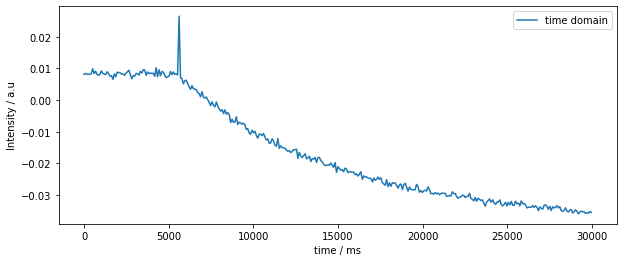

In [ ]:
plt.figure(figsize = (10,4))


plt.plot(time, df.iloc[:,1950], label = "time domain") 
plt.xlabel('time / ms')
plt.ylabel('Intensity / a.u')
plt.legend()


(3647,)


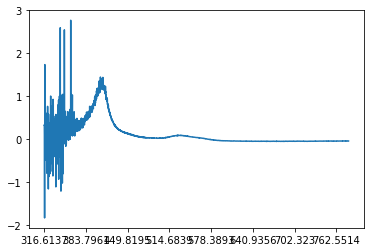

In [ ]:
df1 = df.iloc[0,1:-1]
print(df1.shape)
df1.plot()

In [ ]:
type(df1)

pandas.core.series.Series

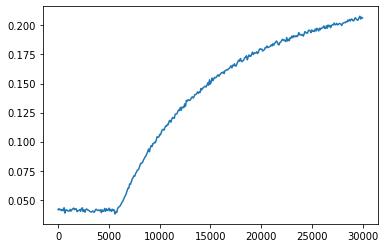

In [ ]:
x = df.iloc[:,0]
y = -(df.iloc[:,1950]-df.iloc[:,1800])
plt.plot(x,y)

In [ ]:
type(time)

pandas.core.series.Series

In [ ]:
# df[0].apply(lambda x: x-df.iloc[[0],[1]])